<a href="https://colab.research.google.com/github/amod404/Practice_Project/blob/main/CIFAR-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape)  # (50000, 32, 32, 3), (50000, 1)

(50000, 32, 32, 3) (50000, 1)


In [3]:
print(x_train.shape, y_train.shape)  # (50000, 32, 32, 3), (50000, 1)

(50000, 32, 32, 3) (50000, 1)


The labels representation


| Label | Class Name       |
| ----- | ---------------- |
| 0     | airplane         |
| 1     | automobile (car) |
| 2     | bird             |
| 3     | cat              |
| 4     | deer             |
| 5     | dog              |
| 6     | frog             |
| 7     | horse            |
| 8     | ship             |
| 9     | truck            |


In [4]:
np.unique_counts(y_train)

UniqueCountsResult(values=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), counts=array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [5]:
X_train_scaled = x_train/255
X_text_scaled = x_test/255

Building the Neural Network


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [14]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# use categorical cross entropy for one hot ending,, but if labls are 1,2,3,4,5.... use sparse categorical cross entropy
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(X_train_scaled,y_train,validation_split=0.08, epochs=40)


Epoch 1/40
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.3041 - loss: 2.0912 - val_accuracy: 0.5197 - val_loss: 1.3636
Epoch 2/40
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5176 - loss: 1.3336 - val_accuracy: 0.5600 - val_loss: 1.2477
Epoch 3/40
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6147 - loss: 1.0942 - val_accuracy: 0.6148 - val_loss: 1.0834
Epoch 4/40
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6642 - loss: 0.9608 - val_accuracy: 0.6908 - val_loss: 0.9481
Epoch 5/40
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7029 - loss: 0.8611 - val_accuracy: 0.7340 - val_loss: 0.7693
Epoch 6/40
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7216 - loss: 0.7986 - val_accuracy: 0.7442 - val_loss: 0.7576
Epoch 7/40
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7413 - loss: 0.7385 - val_accuracy: 0.7435 - val_loss: 0.7778
Epoch 8/40
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7604 - loss: 0.696

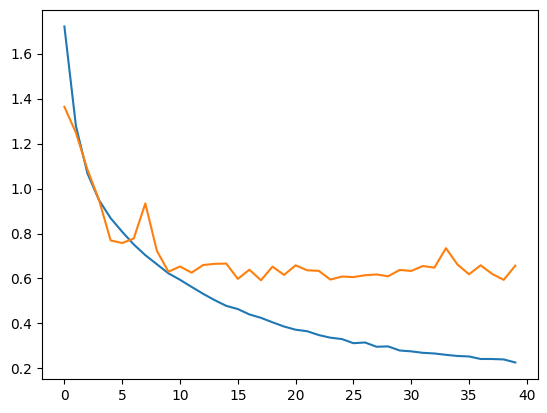

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [18]:
loss, accuracy = model.evaluate(X_text_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8111 - loss: 0.7018
Test Accuracy: 0.8105


Using ResNET-50 model


In [6]:
from tensorflow.keras import Sequential,layers,models, optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.applications.resnet50 import ResNet50

In [7]:
#include_top means not adding the output layer
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [8]:
num_of_class = 10

model = Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_class,activation='relu'))


In [9]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),loss="sparse_categorical_crossentropy" ,metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)


Epoch 1/10
   1/1407 ━━━━━━━━━━━━━━━━━━━━ 27:01:20 69s/step - accuracy: 0.1875 - loss: 7.4521

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
loss, accuracy = model.evaluate(X_text_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")